### Dependências

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Criando conexão com banco de dados

In [2]:
conn = sqlite3.connect("../data/crimes_sp.db")

### Consultas

#### Quantidade de registros do primeiro semetres de 2025

In [3]:
query = ("""
         SELECT COUNT(*) as TOTAL
         FROM ocorrencias
         """)

total_ocorrencias = pd.read_sql_query(query,conn)

In [4]:
total_ocorrencias

,TOTAL
0,226350


#### Crimes por bairro 

In [5]:
query = ("""
        SELECT BAIRRO, COUNT(*) AS qtd
        FROM ocorrencias
        GROUP BY BAIRRO
        ORDER BY qtd DESC
        LIMIT 10
        """)

total_bairro = pd.read_sql_query(query, conn)

In [6]:
total_bairro = total_bairro[::-1]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'BARRA FUNDA'),
  Text(1, 0, 'SANTANA'),
  Text(2, 0, 'TATUAPE'),
  Text(3, 0, 'SANTO AMARO'),
  Text(4, 0, 'VILA MARIANA'),
  Text(5, 0, 'BELA VISTA'),
  Text(6, 0, 'BRAS'),
  Text(7, 0, 'CONSOLACAO'),
  Text(8, 0, 'REPUBLICA'),
  Text(9, 0, 'PINHEIROS')])

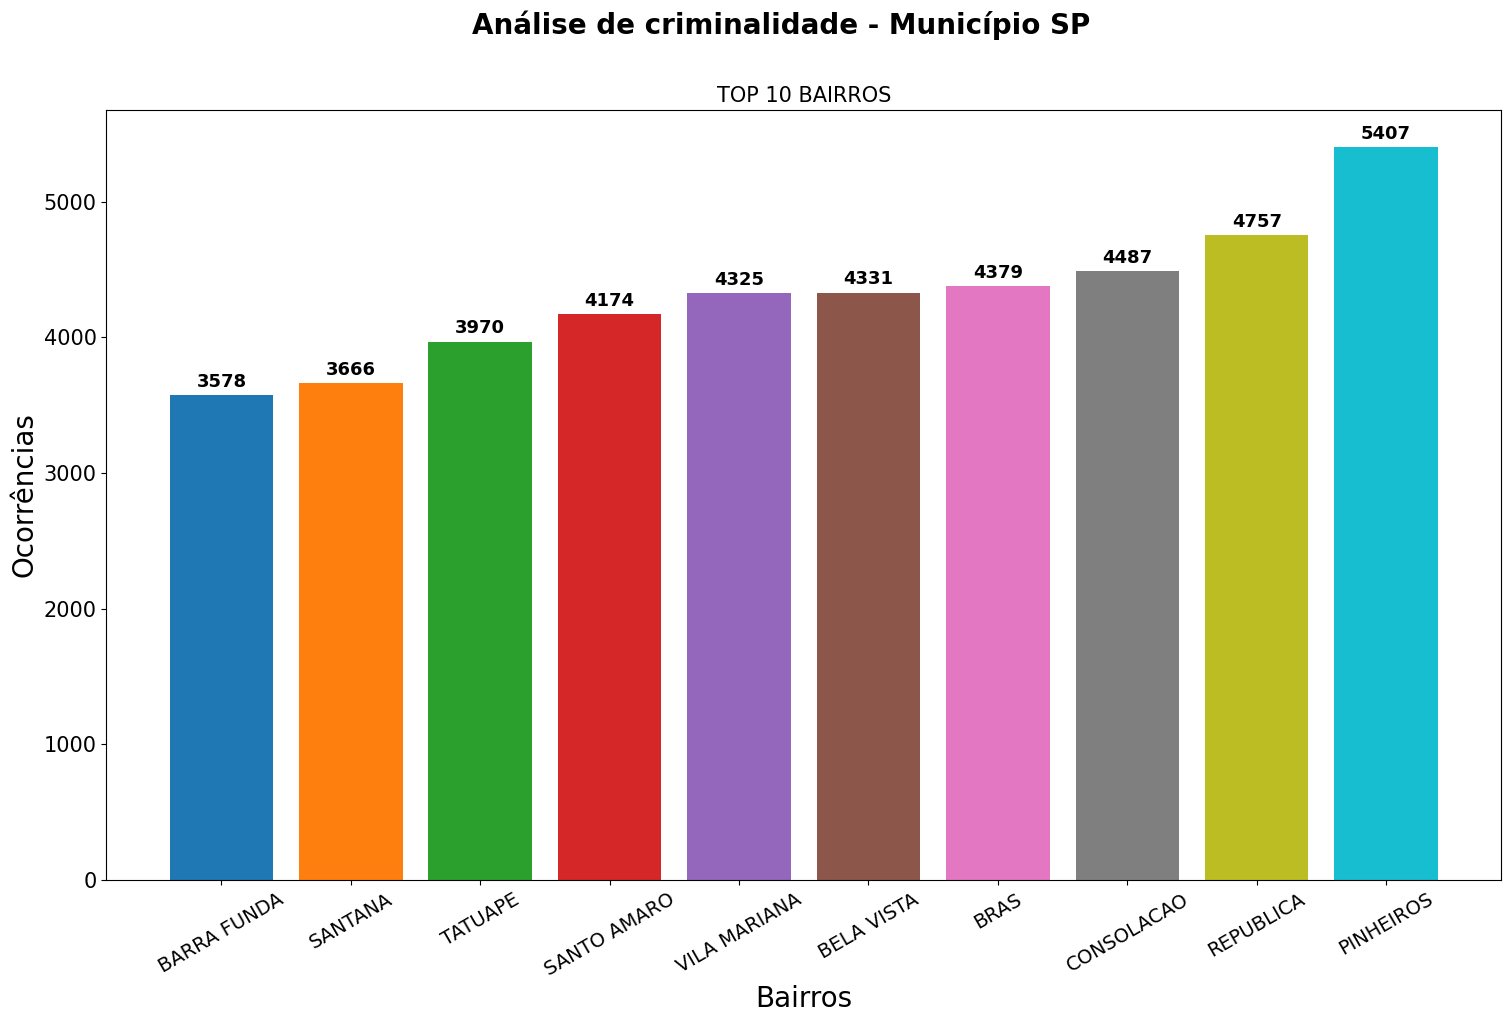

In [15]:
colors = matplotlib.colormaps['tab10'].resampled(10)(range(10))

plt.figure(figsize=(18,10))
plt.suptitle("Análise de criminalidade - Município SP", fontsize=20,fontweight='bold')
bar_container = plt.bar(total_bairro.BAIRRO, total_bairro.qtd, color=colors) # container para utilizar o bar_label
plt.bar_label(bar_container, labels=[f'{v}' for v in total_bairro.qtd],padding=3, fontsize=13, fontweight='bold')
plt.title('TOP 10 BAIRROS', size=15)
plt.xlabel('Bairros', size=20)
plt.ylabel('Ocorrências', size=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=30,fontsize=14)



#### Ocorrências por mês

In [8]:
query = (
        """
        SELECT CAST(strftime('%m', DATA_REGISTRO) AS INTEGER) AS MES,COUNT(*) AS QNTD
        FROM ocorrencias
        WHERE MES <= 6
        GROUP BY MES
        ORDER BY DATA_REGISTRO DESC
        """
    )

ocorrencias_mes = pd.read_sql_query(query, conn)

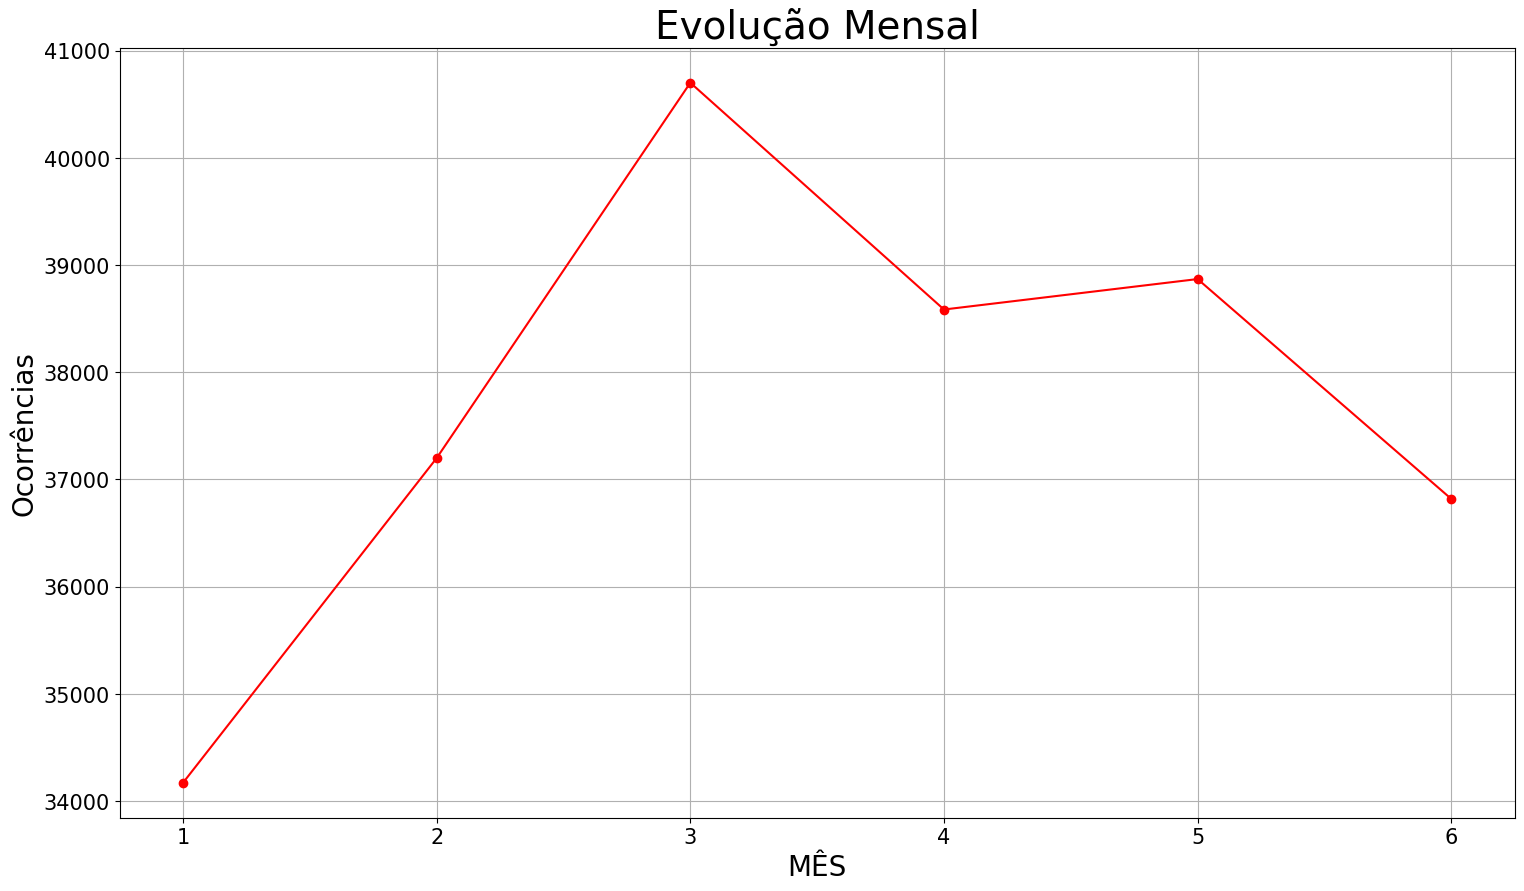

In [16]:
plt.figure(figsize=(18,10))
plt.plot(ocorrencias_mes.MES, ocorrencias_mes.QNTD, marker='o', linestyle='-', color='r')
plt.title('Evolução Mensal', size=28)
plt.xlabel('MÊS', size=20)
plt.ylabel('Ocorrências', size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)
plt.show()

#### TOP 5 crimes

In [10]:
query = ("""
            SELECT RUBRICA, COUNT(*) AS QNTD, ROUND(COUNT(*) * 100 / CAST((SELECT COUNT(*) from ocorrencias) AS FLOAT),2) AS PERCENTUAL
            FROM ocorrencias
            GROUP BY RUBRICA
            ORDER BY QNTD DESC
            LIMIT 5
        """)

top_crimes = pd.read_sql_query(query,conn)
top_crimes = top_crimes[::-1]

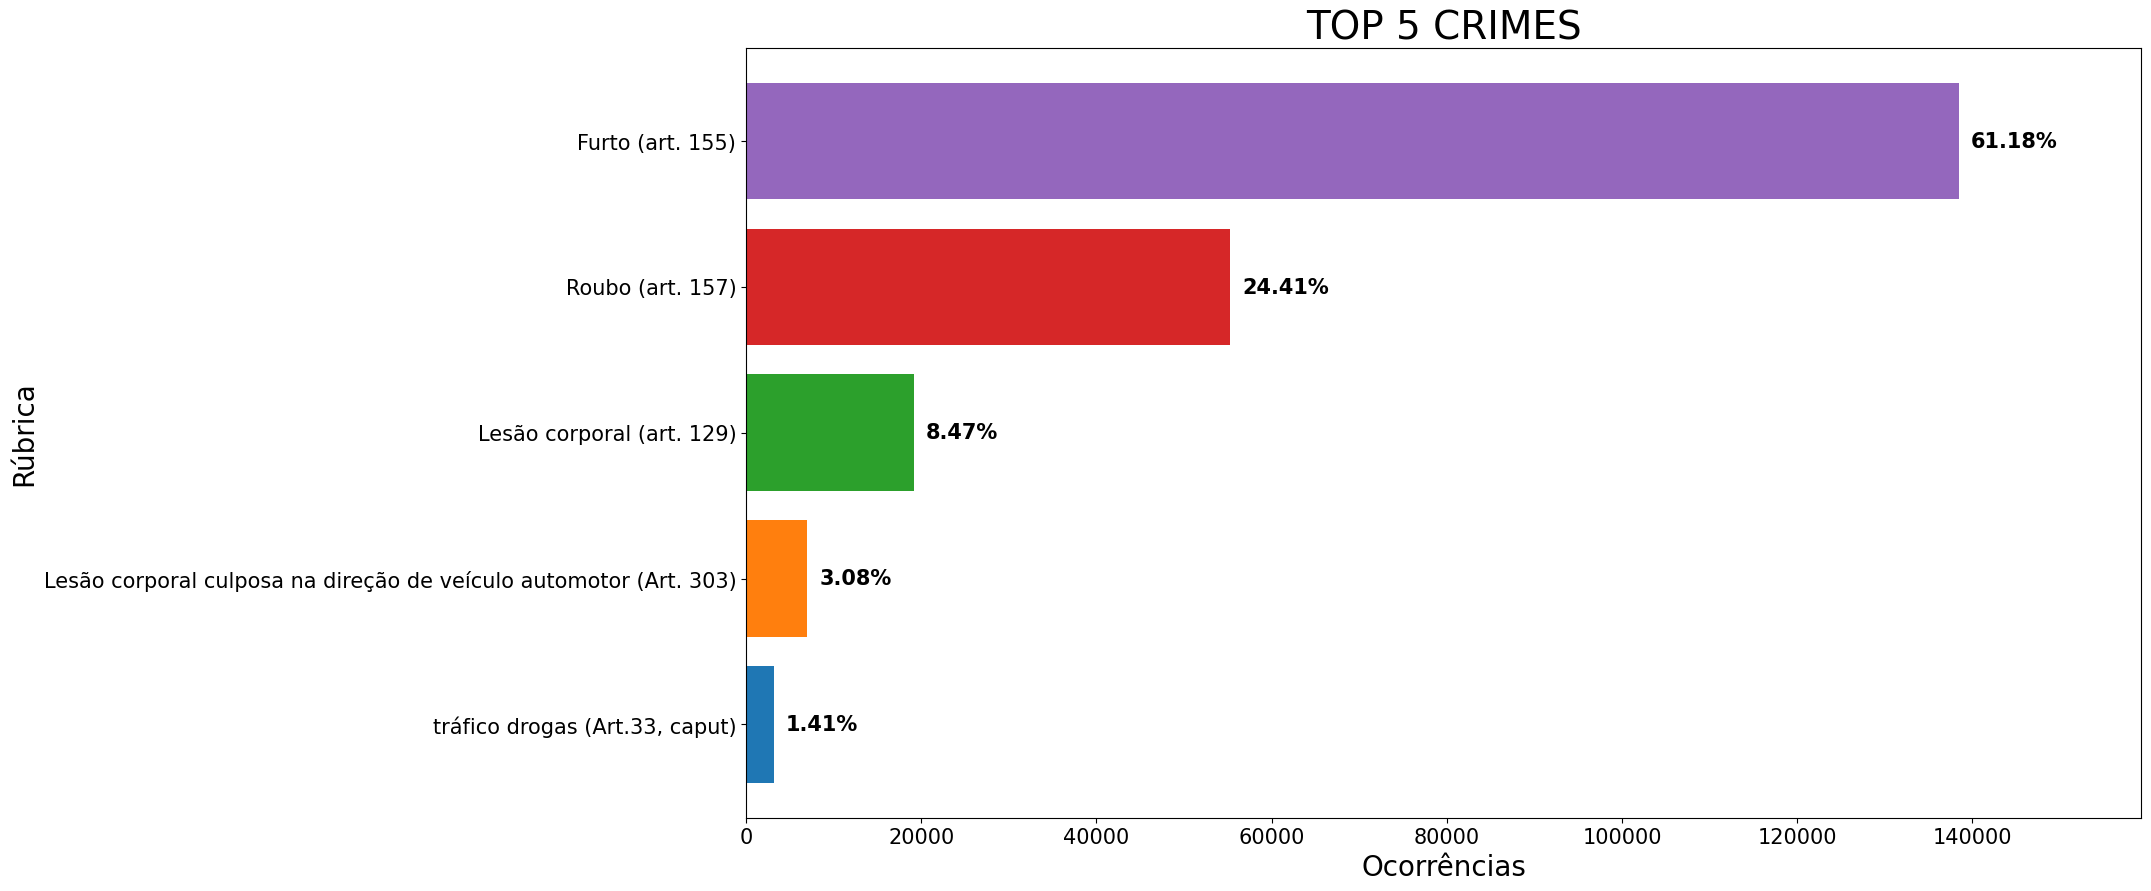

In [17]:
plt.figure(figsize=(18,10))
plt.barh(top_crimes.RUBRICA, top_crimes.QNTD, color=colors)
plt.title('TOP 5 CRIMES', size=28)
plt.xlabel('Ocorrências', size=20)
plt.ylabel('Rúbrica', size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.xlim(0, max(top_crimes.QNTD) * 1.15)

for i, (qntd, perc) in enumerate(zip(top_crimes.QNTD, top_crimes.PERCENTUAL)):
    plt.text(
        qntd + (max(top_crimes.QNTD) * 0.01),  
        i,                                     
        f'{perc:.2f}%',                        
        va='center',
        fontsize=15,
        fontweight='bold'
    )

plt.show()

#### Cronologia do crime - Crimes por período do dia

In [12]:
query = ("""
        SELECT DESC_PERIODO, COUNT(*) AS QNTD
        FROM ocorrencias
        GROUP BY DESC_PERIODO
        HAVING DESC_PERIODO is not null
        ORDER BY QNTD DESC
        """)

periodo_crime = pd.read_sql_query(query,conn)

Text(0.5, 1.0, 'Períodos mais recorrentes')

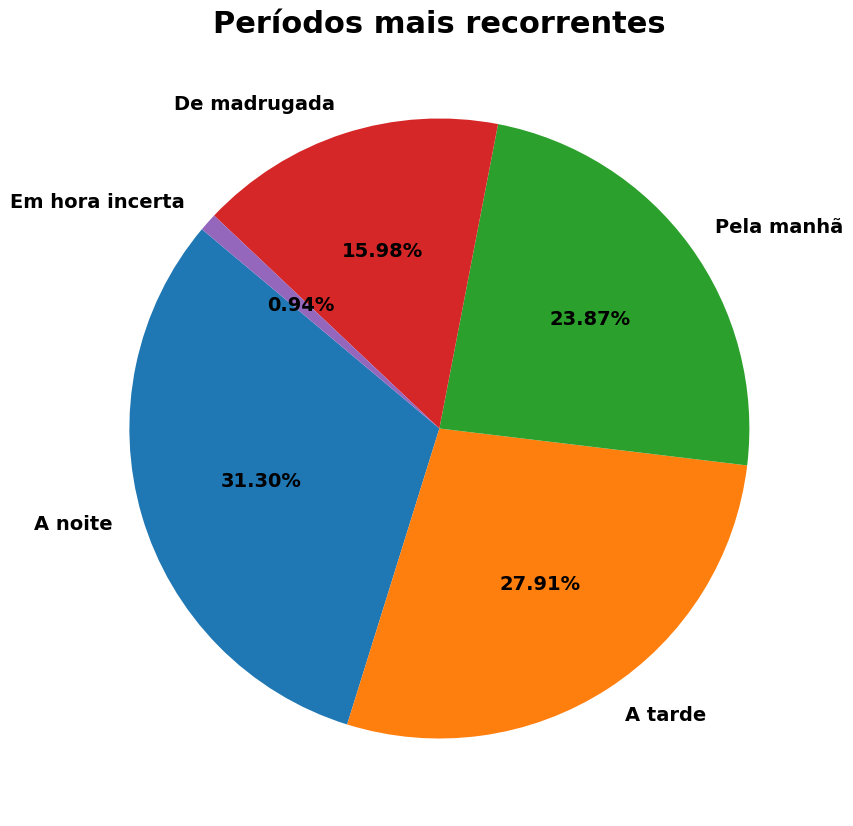

In [13]:
plt.figure(figsize=(10, 18))

plt.pie(
    periodo_crime.QNTD,
    labels=periodo_crime.DESC_PERIODO,
    autopct='%1.2f%%',
    startangle=140,         
    textprops={'fontsize': 14, 'fontweight': 'bold'},
)

plt.title('Períodos mais recorrentes', fontsize=22, fontweight='bold')
